In [1]:
%load_ext autoreload
%autoreload 2

/Users/imjeonghun/miniforge3/envs/cs520/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.2-CAPI-1.17.2). Conversions between both will be slow.
  warnings.warn(


<Axes: >

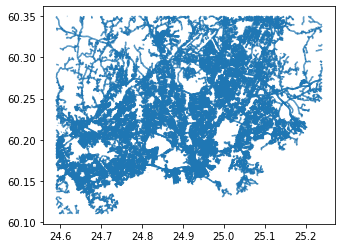

In [2]:
from pyrosm import get_data, OSM
import matplotlib.pyplot as plt
import pandas as pd


def get_xy(nodes, node_id):
    node_row = nodes.loc[nodes['id'] == node_id]
    return (node_row['lon'].tolist()[0], node_row['lat'].tolist()[0])


# "test_pbf", "Helsinki"
map_name = 'test_pbf'
map_name = "Helsinki"

map_name_cpp = {'test_pbf': 'maps/test', 'Helsinki': 'maps/Helsinki'}[map_name]
osm = OSM(get_data(map_name))
nodes, edges = osm.get_network(network_type="driving", nodes=True)

nodes = nodes[['lon', 'lat', 'id']]


edges.plot()
    

In [3]:
nodes.sort_values(by=['lon', 'lat'])

,lon,lat,id
69553,24.590004,60.276180,26485219
149096,24.590005,60.144549,7427892561
362657,24.590006,60.145258,7427892520
162189,24.590007,60.247067,946786532
162209,24.590007,60.251755,7745137662
...,...,...,...
116997,25.239974,60.286960,471947933
192203,25.239981,60.309058,1364091517
197816,25.239982,60.273683,2615677591
116996,25.239983,60.285299,471947928


In [4]:
def plot_path(edges, coords):
    
    for index, row in edges.iterrows():
        u_id, v_id = row['u'], row['v']
        u, v = get_xy(nodes, u_id), get_xy(nodes, v_id)
        plt.plot([u[0], v[0]], [u[1], v[1]], color='blue')

    for i in range(len(coords)-1):
        plt.plot([coords[i][0], coords[i+1][0]], [coords[i][1], coords[i+1][1]], color='red')
    plt.show()

412002 430472


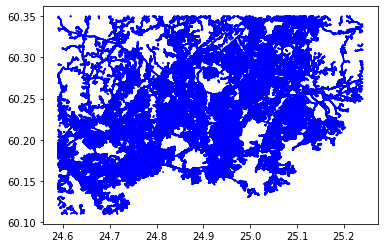

In [5]:
nodes = pd.read_csv(map_name_cpp + ".nodes.csv")
edges = pd.read_csv(map_name_cpp + ".edges.csv")
print(len(nodes), len(edges))
plot_path(edges, [])

404336 423398


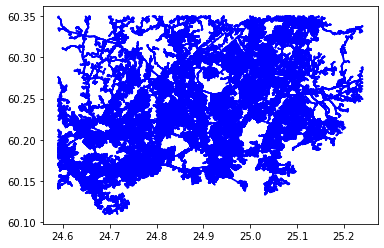

In [6]:
nodes = pd.read_csv(map_name_cpp + ".maxGroup.nodes.csv")
edges = pd.read_csv(map_name_cpp + ".maxGroup.edges.csv")
print(len(nodes), len(edges))
nodes = nodes.sort_values(by=['lon', 'lat'])
plot_path(edges, [])

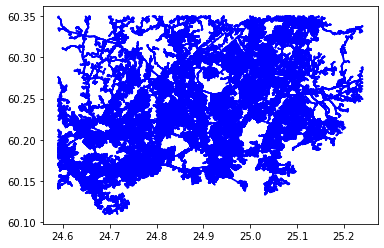

In [7]:


plot_path(edges, [])

In [8]:
from Graph import Graph

g = Graph(map_name_cpp)

maps/test
maps/Helsinki


In [9]:

# lon, lat = 26.93, 60.52
# lon, lat = 26.960, 60.5375 
# lon, lat = 26.9500, 60.5300
# node_id, node = g.getNearestNode(lon, lat)

In [10]:
# plt.scatter(lon, lat, color="pink")

# for index, row in edges.iterrows():
#     u_id, v_id = row['u'], row['v']

#     u, v = get_xy(nodes, u_id), get_xy(nodes, v_id)
    
#     plt.plot([u[0], v[0]], [u[1], v[1]], color='blue')
    
# plt.scatter(node[0], node[1], color="red")
    
# plt.show()
# print(node_id)

In [11]:
nodes.loc[nodes['id'] == 3735779715]

,Unnamed: 0,id,lon,lat,elevation


In [47]:

source, v = 960407257, 3350088311
source, v = 3350088322	, 960407257
# source = g.getRandomNode()
# v = g.getRandomNode()
# print(source, v)
source, v = g.RandomNodeId(), g.RandomNodeId()
print(source, v)
print(nodes[nodes['id'].isin([source, v])])

def plot_path(edges, coords):
    
    for index, row in edges.iterrows():
        u_id, v_id = row['u'], row['v']
        u, v = get_xy(nodes, u_id), get_xy(nodes, v_id)
        plt.plot([u[0], v[0]], [u[1], v[1]], color='blue')

    for i in range(len(coords)-1):
        plt.plot([coords[i][0], coords[i+1][0]], [coords[i][1], coords[i+1][1]], color='red')
    plt.show()
    

1541544372 56131313
Empty GeoDataFrame
Columns: [lon, lat, tags, timestamp, version, changeset, id, geometry]
Index: []


In [48]:

import osmnx as ox
import networkx as nx
osm = OSM(get_data('test_pbf'))
nodes, edges = osm.get_network(network_type="driving", nodes=True)
G = osm.to_graph(nodes, edges, graph_type="networkx")
route = nx.shortest_path(G, source, v, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

NodeNotFound: Either source 1541544372 or target 56131313 is not in G

length: 28846.848140000013


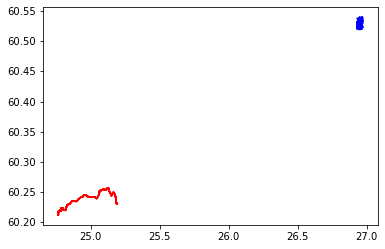

length: 28839.628060000014


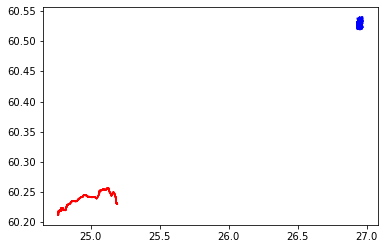

length: 40582.13715999998


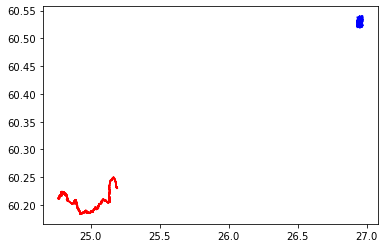

[[25.190864  60.2302704]
 [25.190829  60.2302702]
 [25.1905277 60.2302685]
 ...
 [24.7633527 60.2119715]
 [24.7630753 60.2120355]
 [24.7628622 60.2120847]]


In [49]:
length, coords = g.aStarAlgorithm(source, v)
print('length:', length)
plot_path(edges, coords)

length, coords = g.dijkstraAlgorithm(source, v)
print('length:', length)
plot_path(edges, coords)

length, coords = g.findElevationBasedPath(source, v)
print('length:', length)
plot_path(edges, coords)
print(coords)

In [ ]:

# backend: graph, algorithm, api
# frontend: react